# Team Update 5

For this assignment, you'll be creating a complete version of your design system from start to finish. Modify the code cells below to reflect your design choices.

In [1]:
import os
from pathlib import Path

import sys
ISST_DIR = str(Path(os.getcwd()).parent.parent.parent)
sys.path.append(ISST_DIR)

import numpy as np
import arviz as az
import pymc as pm

import ISST

# Cost Risk Table

First, create your overall cost Risk Table by completing the inputs for the Risk Table. Adjust your breakpoints and utility levels to obtain a satisfactory utility function.

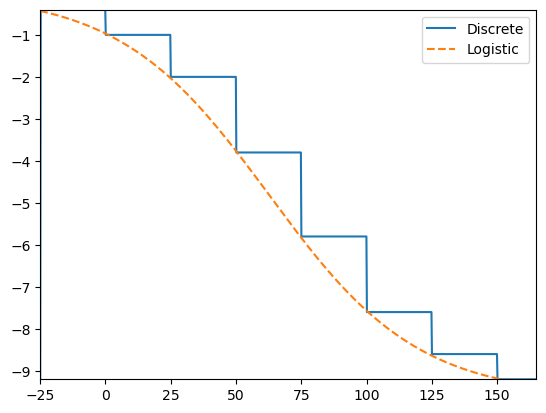

In [3]:
Cost_Risk_Table = ISST.RiskTable(name='Cost',
                                 units = 'euros',
                                 utility_breakpoints=([-25, 0, 25, 50, 75, 100, 125, 150]),
                                 utilities=[-0.4, -1., -2., -3.8, -5.8, -7.6, -8.6, -9.2],
                                 utility_names=['-25M Euros',
                                                '0M Euros',
                                                '25M Euros',
                                                '50M Euros',
                                                '75M Euros',
                                                '100M Euros',
                                                '125M Euros',
                                                '150M Euros']
                                 )

Cost_Risk_Table.plot_utilities()

# Schedule Risk Table

Next, the same for your schedule risk table:

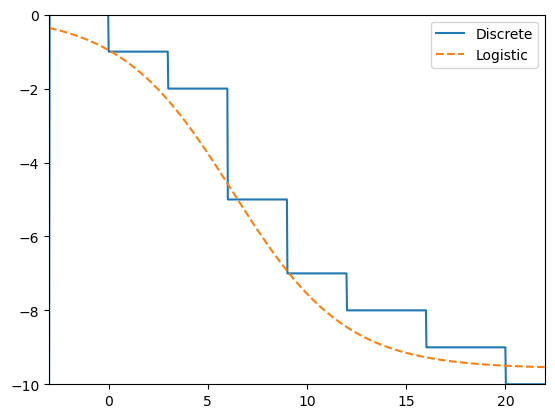

In [4]:
Schedule_Risk_Table = ISST.RiskTable(name='Schedule',
                                     units = 'months',
                                     utility_breakpoints=[-3., 0, 3., 6., 9., 12., 16., 20.],
                                     utilities=[0., -1., -2., -5., -7, -8., -9., -10.],
                                     utility_names=['-3 Months',
                                                '0 Months',
                                                '3 Month',
                                                '6 Months',
                                                '9 Months',
                                                '12 Months',
                                                '16 Months',
                                                '20 Months']
                                     )

Schedule_Risk_Table.plot_utilities()

# Technical Risk Tables

Next, your Technical Risk Tables. Identify the key technical parameters for each sub team, and assemble risk tables for each. There should be at minimum one risk table per sub-team, but not more than three. Copy and paste the code below as necessary, changing the variable names and the `name` parameter of the Risk Table.

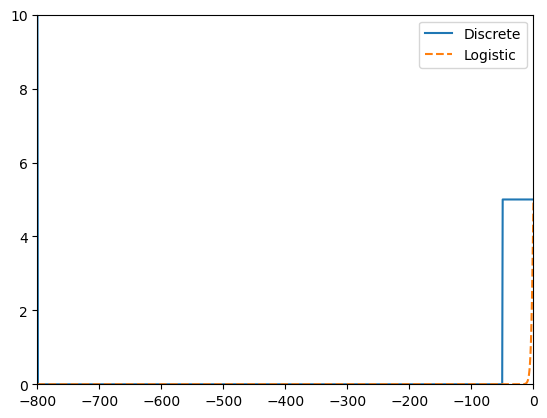

In [5]:
nominal_power = 800

Payload_Power = ISST.RiskTable(name='Power',
                                 units = 'W',
                                 utility_breakpoints=np.array([0., 750., 800.])-nominal_power,
                                 utilities=[0., 5., 10.],
                                 utility_names=['Under Spec', 'Near Spec', 'At Spec']
                                 )

Payload_Power.L = 10
Payload_Power.k = 0.5
Payload_Power.x0 = 800 - nominal_power

Payload_Power.plot_utilities()

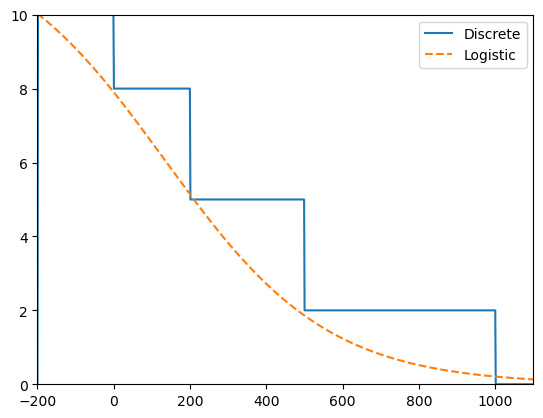

In [6]:
nominal_mass = 1000

Payload_Mass = ISST.RiskTable(name='Mass',
                                 units = 'kg',
                                 utility_breakpoints=np.array([800., 1000., 1200., 1500., 2000.])-nominal_mass,
                                 utilities=[10., 8., 5., 2., 0.],
                                 utility_names=['200 kg Below Spec',
                                                'At Spec',
                                                '200 kg Above Spec',
                                                '500 kg Above Spec',
                                                'Launch Vehicle Limit']
                                 )

Payload_Mass.plot_utilities()

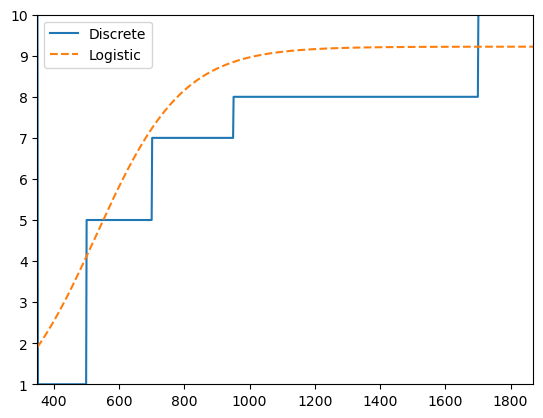

In [10]:
nominal_dv = 500

Payload_Delta_v = ISST.RiskTable(name='Delta V',
                                 units = 'm/s',
                                 utility_breakpoints=np.array([150, 300, 500, 750, 1500])+700-nominal_dv,
                                 utilities=[1., 5., 7., 8., 10.],
                                 utility_names=['150 m/s',
                                                '300 m/s',
                                                '500 m/s',
                                                '750 m/s',
                                                '1500 m/s']
                                 )

Payload_Delta_v.plot_utilities()

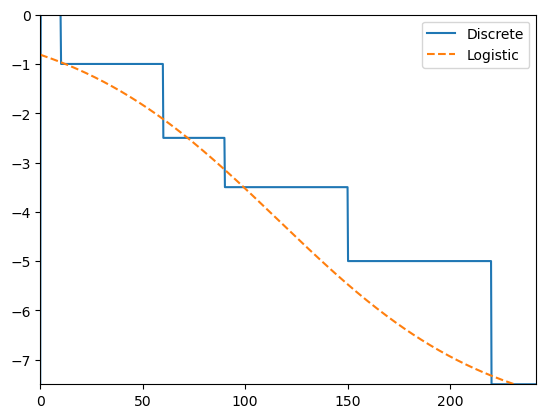

In [7]:
nominal_GRS = 30

GRS_Temp = ISST.RiskTable(name='GRS Temperature',
                                 units = 'K',
                                 utility_breakpoints=np.array([30, 40, 90, 120, 180, 250])-nominal_GRS,
                                 utilities=[0, -1, -2.5, -3.5, -5, -7.5],
                                 utility_names=['Design Temperature',
                                                'Mild Degredation',
                                                'Slight Degredation',
                                                'Moderate Degredation',
                                                'Significant Degredation',
                                                'Sensor Failure']
                                 )

GRS_Temp.plot_utilities()

# Risks

Identify the most important risks to your cost, schedule, and each technical parameter of your design system. You should have at minimum one major risk for each risk table identified above, and no more than three times as many risks as risk tables.

In [11]:
# Cost Risks
Funding_Risk = ISST.Risk(name='Costs Need to be Spread Out', baseline_likelihood = 0.26)
#Schedule Risks
Qual_Risk = ISST.Risk(name='Components Fail During Qualification', baseline_likelihood = 0.24)
#GRS Resolution
Cooler_Risk = ISST.Risk(name='GRS Cryocooler Failure', baseline_likelihood = 0.08)
Calibration_Risk = ISST.Risk(name='Sensor Calibration Fails', baseline_likelihood = 0.04)
#Payload Power
Deployable_Risk = ISST.Risk(name='Mecahnisms Fail to Deploy', baseline_likelihood = 0.0067)
#Payload Mass
Manufacturing_Risk = ISST.Risk(name='Assembly Requires Design Modifications', baseline_likelihood = 0.03)
#Payload Delta v
Dev_Risk = ISST.Risk(name='Propulsion Maturity is Behind Expectations', baseline_likelihood = 0.30)

In [12]:
full_risk_list = [Funding_Risk, Qual_Risk, Cooler_Risk, Calibration_Risk, Deployable_Risk, Manufacturing_Risk, Dev_Risk]
full_technical_impact_list = [GRS_Temp, Payload_Power, Payload_Delta_v, Payload_Mass]

# Design System

Specify your design system

In [13]:
Design_System = ISST.DesignSystem(name='Example Design System',
                                  model_context=pm.Model(),
                                  risks=full_risk_list,
                                  schedule_risk_table = Schedule_Risk_Table,
                                  cost_risk_table = Cost_Risk_Table,
                                  technical_risk_tables = full_technical_impact_list)

# Risk Specification

Run the `generate_system_specification` method for your design system

In [11]:
#Design_System.generate_system_specification()

You will now have CSV files in a subdirectory which can be used to fill out your risk specification.

Once they are filled out, read the specification back into your design system.

In [14]:
Design_System.read_system_specification()

# Analyze System

Run the Monte Carlo simulation of your design system and save them to a file.

In [15]:
results = Design_System.analyze_system()
results.to_netcdf('Analysis Results.nc')
# results = az.from_netcdf('Analysis Results.nc')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Costs Need to be Spread Out Cost Scaled Impact, Components Fail During Qualification Cost Scaled Impact, GRS Cryocooler Failure Cost Scaled Impact, Sensor Calibration Fails Cost Scaled Impact, Mecahnisms Fail to Deploy Cost Scaled Impact, Assembly Requires Design Modifications Cost Scaled Impact, Propulsion Maturity is Behind Expectations Cost Scaled Impact, Costs Need to be Spread Out Schedule Scaled Impact, Components Fail During Qualification Schedule Scaled Impact, GRS Cryocooler Failure Schedule Scaled Impact, Sensor Calibration Fails Schedule Scaled Impact, Mecahnisms Fail to Deploy Schedule Scaled Impact, Assembly Requires Design Modifications Schedule Scaled Impact, Propulsion Maturity is Behind Expectations Schedule Scaled Impact, Costs Need to be Spread Out Technical Parameter 0 Scaled Impact, Costs Need to be Spread Out Technical Parameter 1 Scaled Im

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 98 seconds.


'Analysis Results.nc'

# Results Inspection

First, let's look at the summary of results for your total impacts:

array([[<AxesSubplot: title={'center': 'Total Cost Impact'}>,
        <AxesSubplot: title={'center': 'Total Schedule Impact'}>,
        <AxesSubplot: title={'center': 'Total GRS Temperature Impact'}>],
       [<AxesSubplot: title={'center': 'Total Power Impact'}>,
        <AxesSubplot: title={'center': 'Total Delta V Impact'}>,
        <AxesSubplot: title={'center': 'Total Mass Impact'}>]],
      dtype=object)

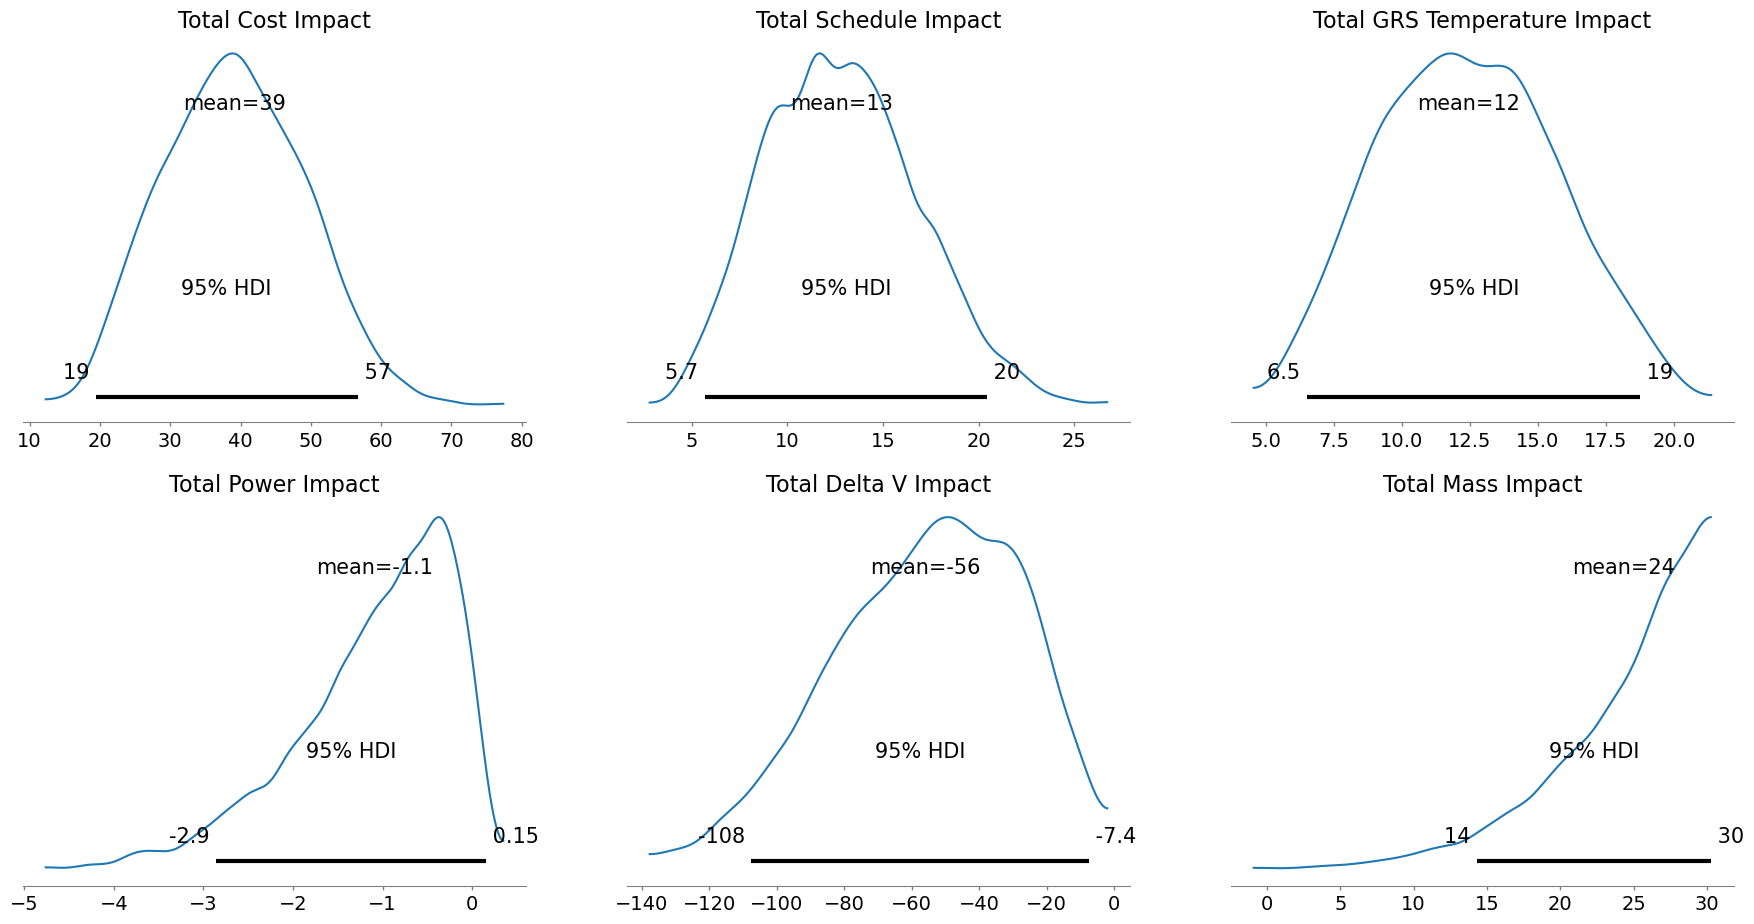

In [16]:
az.plot_posterior(results,
                  var_names=['Total'],
                  filter_vars='like',
                  hdi_prob=0.95)

In [15]:
az.summary(results,
           var_names=['Total'],
           filter_vars="like",
           round_to=2,
           kind='stats')

,mean,sd,hdi_3%,hdi_97%
Total Cost Impact,39.25,9.77,21.47,56.95
Total Schedule Impact,12.91,3.84,5.81,19.95
Total GRS Temperature Impact,38.30,3.32,32.40,44.36
Total Power Impact,764.19,0.84,762.64,765.45
Total Delta V Impact,423.20,27.01,375.81,469.45
Total Mass Impact,980.84,5.21,970.69,986.95


Next, the results for your cost analysis:

array([[<Axes: title={'center': 'Costs Need to be Spread Out Cost Impact'}>,
        <Axes: title={'center': 'Components Fail During Qualification Cost Impact'}>,
        <Axes: title={'center': 'GRS Cryocooler Failure Cost Impact'}>,
        <Axes: title={'center': 'Sensor Calibration Fails Cost Impact'}>],
       [<Axes: title={'center': 'Mecahnisms Fail to Deploy Cost Impact'}>,
        <Axes: title={'center': 'Assembly Requires Design Modifications Cost Impact'}>,
        <Axes: title={'center': 'Propulsion Maturity is Behind Expectations Cost Impact'}>,
        <Axes: title={'center': 'Total Cost Impact'}>]], dtype=object)

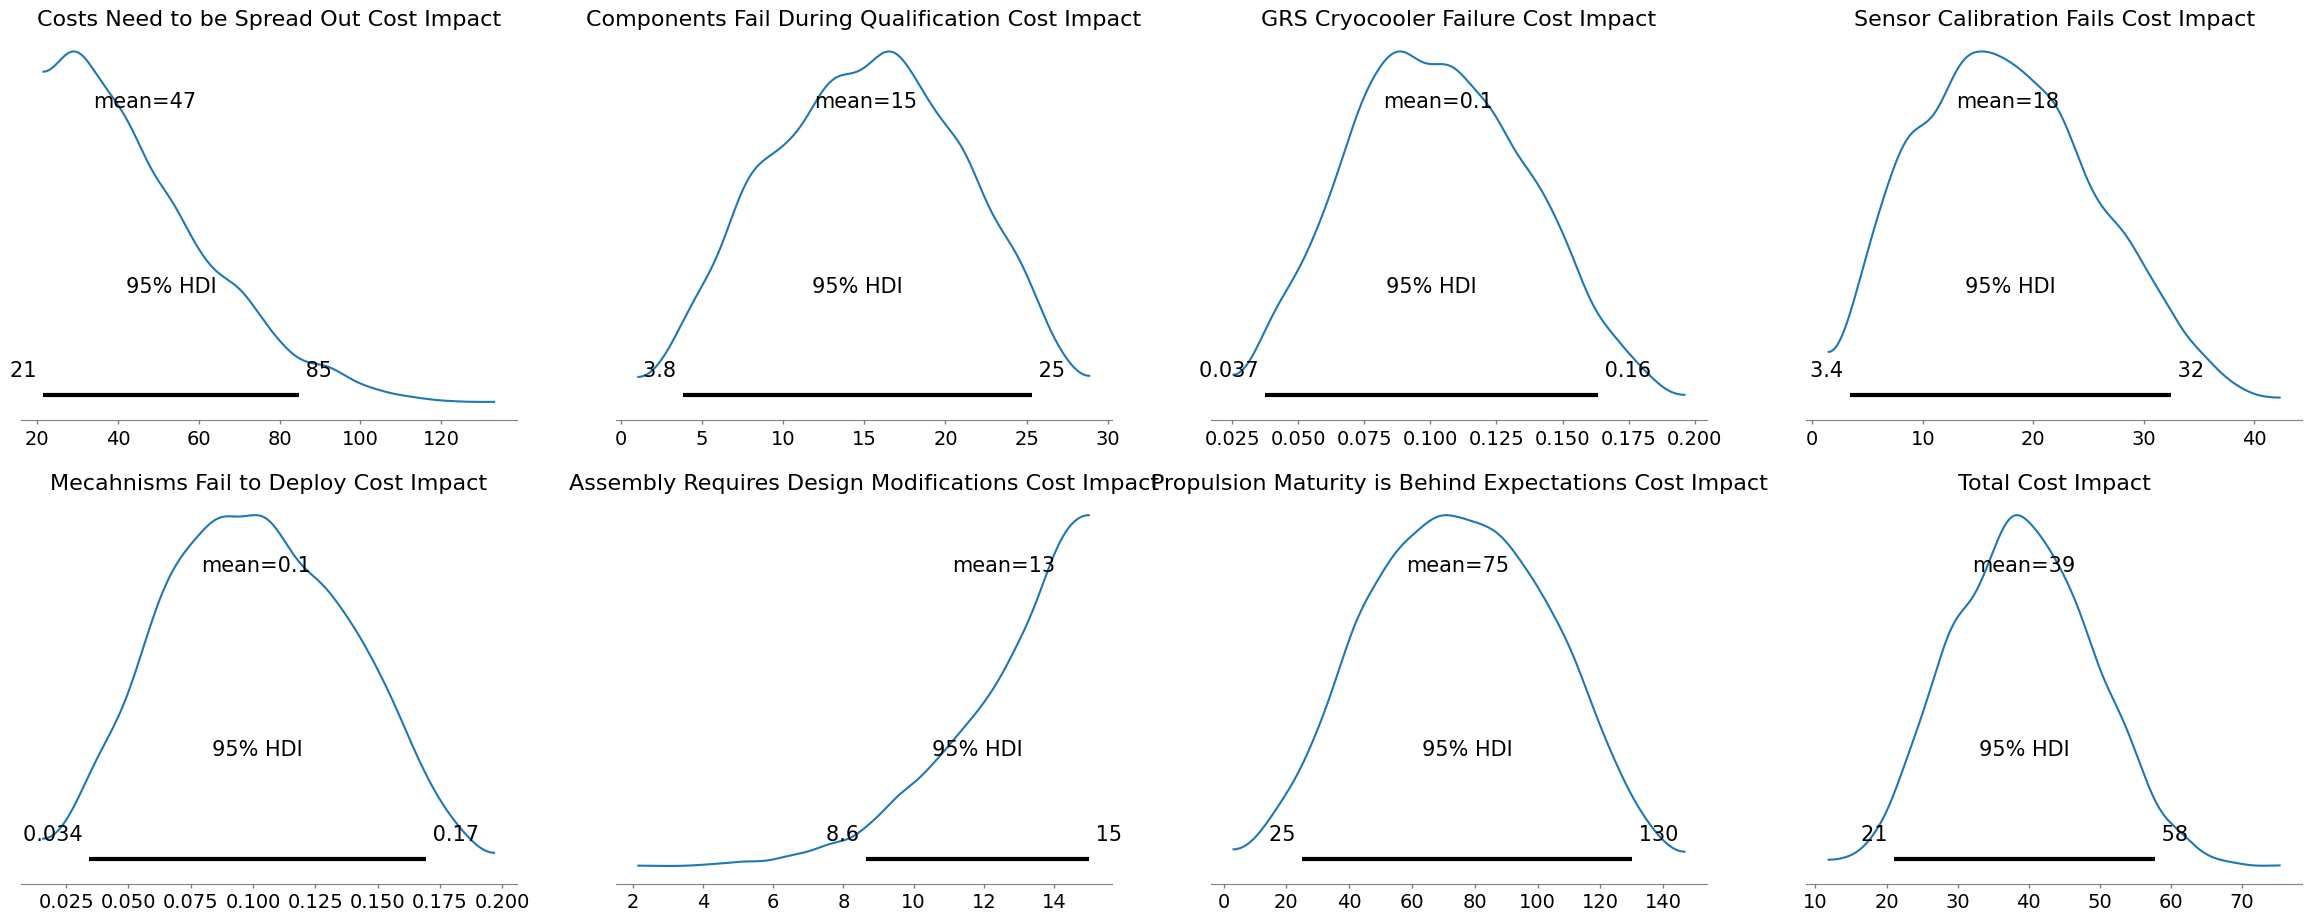

In [16]:
az.plot_posterior(results,
                  var_names=['Cost Impact'],
                  filter_vars='like',
                  hdi_prob=0.95)

In [17]:
az.summary(results,
           var_names=['Cost Impact'],
           filter_vars="like",
           round_to=2,
           kind='stats')

,mean,sd,hdi_3%,hdi_97%
Costs Need to be Spread Out Cost Impact,46.62,19.16,21.44,81.17
Components Fail During Qualification Cost Impact,15.10,5.83,4.31,25.22
GRS Cryocooler Failure Cost Impact,0.10,0.03,0.04,0.16
Sensor Calibration Fails Cost Impact,17.70,7.97,3.56,31.74
Mecahnisms Fail to Deploy Cost Impact,0.10,0.04,0.03,0.16
Assembly Requires Design Modifications Cost Impact,12.55,2.02,8.89,15.00
Propulsion Maturity is Behind Expectations Cost Impact,74.72,28.11,25.07,126.30
Total Cost Impact,39.25,9.77,21.47,56.95


Next, the results for your schedule analysis:

array([[<Axes: title={'center': 'Costs Need to be Spread Out Schedule Scaled Impact'}>,
        <Axes: title={'center': 'Components Fail During Qualification Schedule Scaled Impact'}>,
        <Axes: title={'center': 'GRS Cryocooler Failure Schedule Scaled Impact'}>],
       [<Axes: title={'center': 'Sensor Calibration Fails Schedule Scaled Impact'}>,
        <Axes: title={'center': 'Mecahnisms Fail to Deploy Schedule Scaled Impact'}>,
        <Axes: title={'center': 'Assembly Requires Design Modifications Schedule Scaled Impact'}>],
       [<Axes: title={'center': 'Propulsion Maturity is Behind Expectations Schedule Scaled Impact'}>,
        <Axes: title={'center': 'Costs Need to be Spread Out Schedule Impact'}>,
        <Axes: title={'center': 'Components Fail During Qualification Schedule Impact'}>],
       [<Axes: title={'center': 'GRS Cryocooler Failure Schedule Impact'}>,
        <Axes: title={'center': 'Sensor Calibration Fails Schedule Impact'}>,
        <Axes: title={'center':

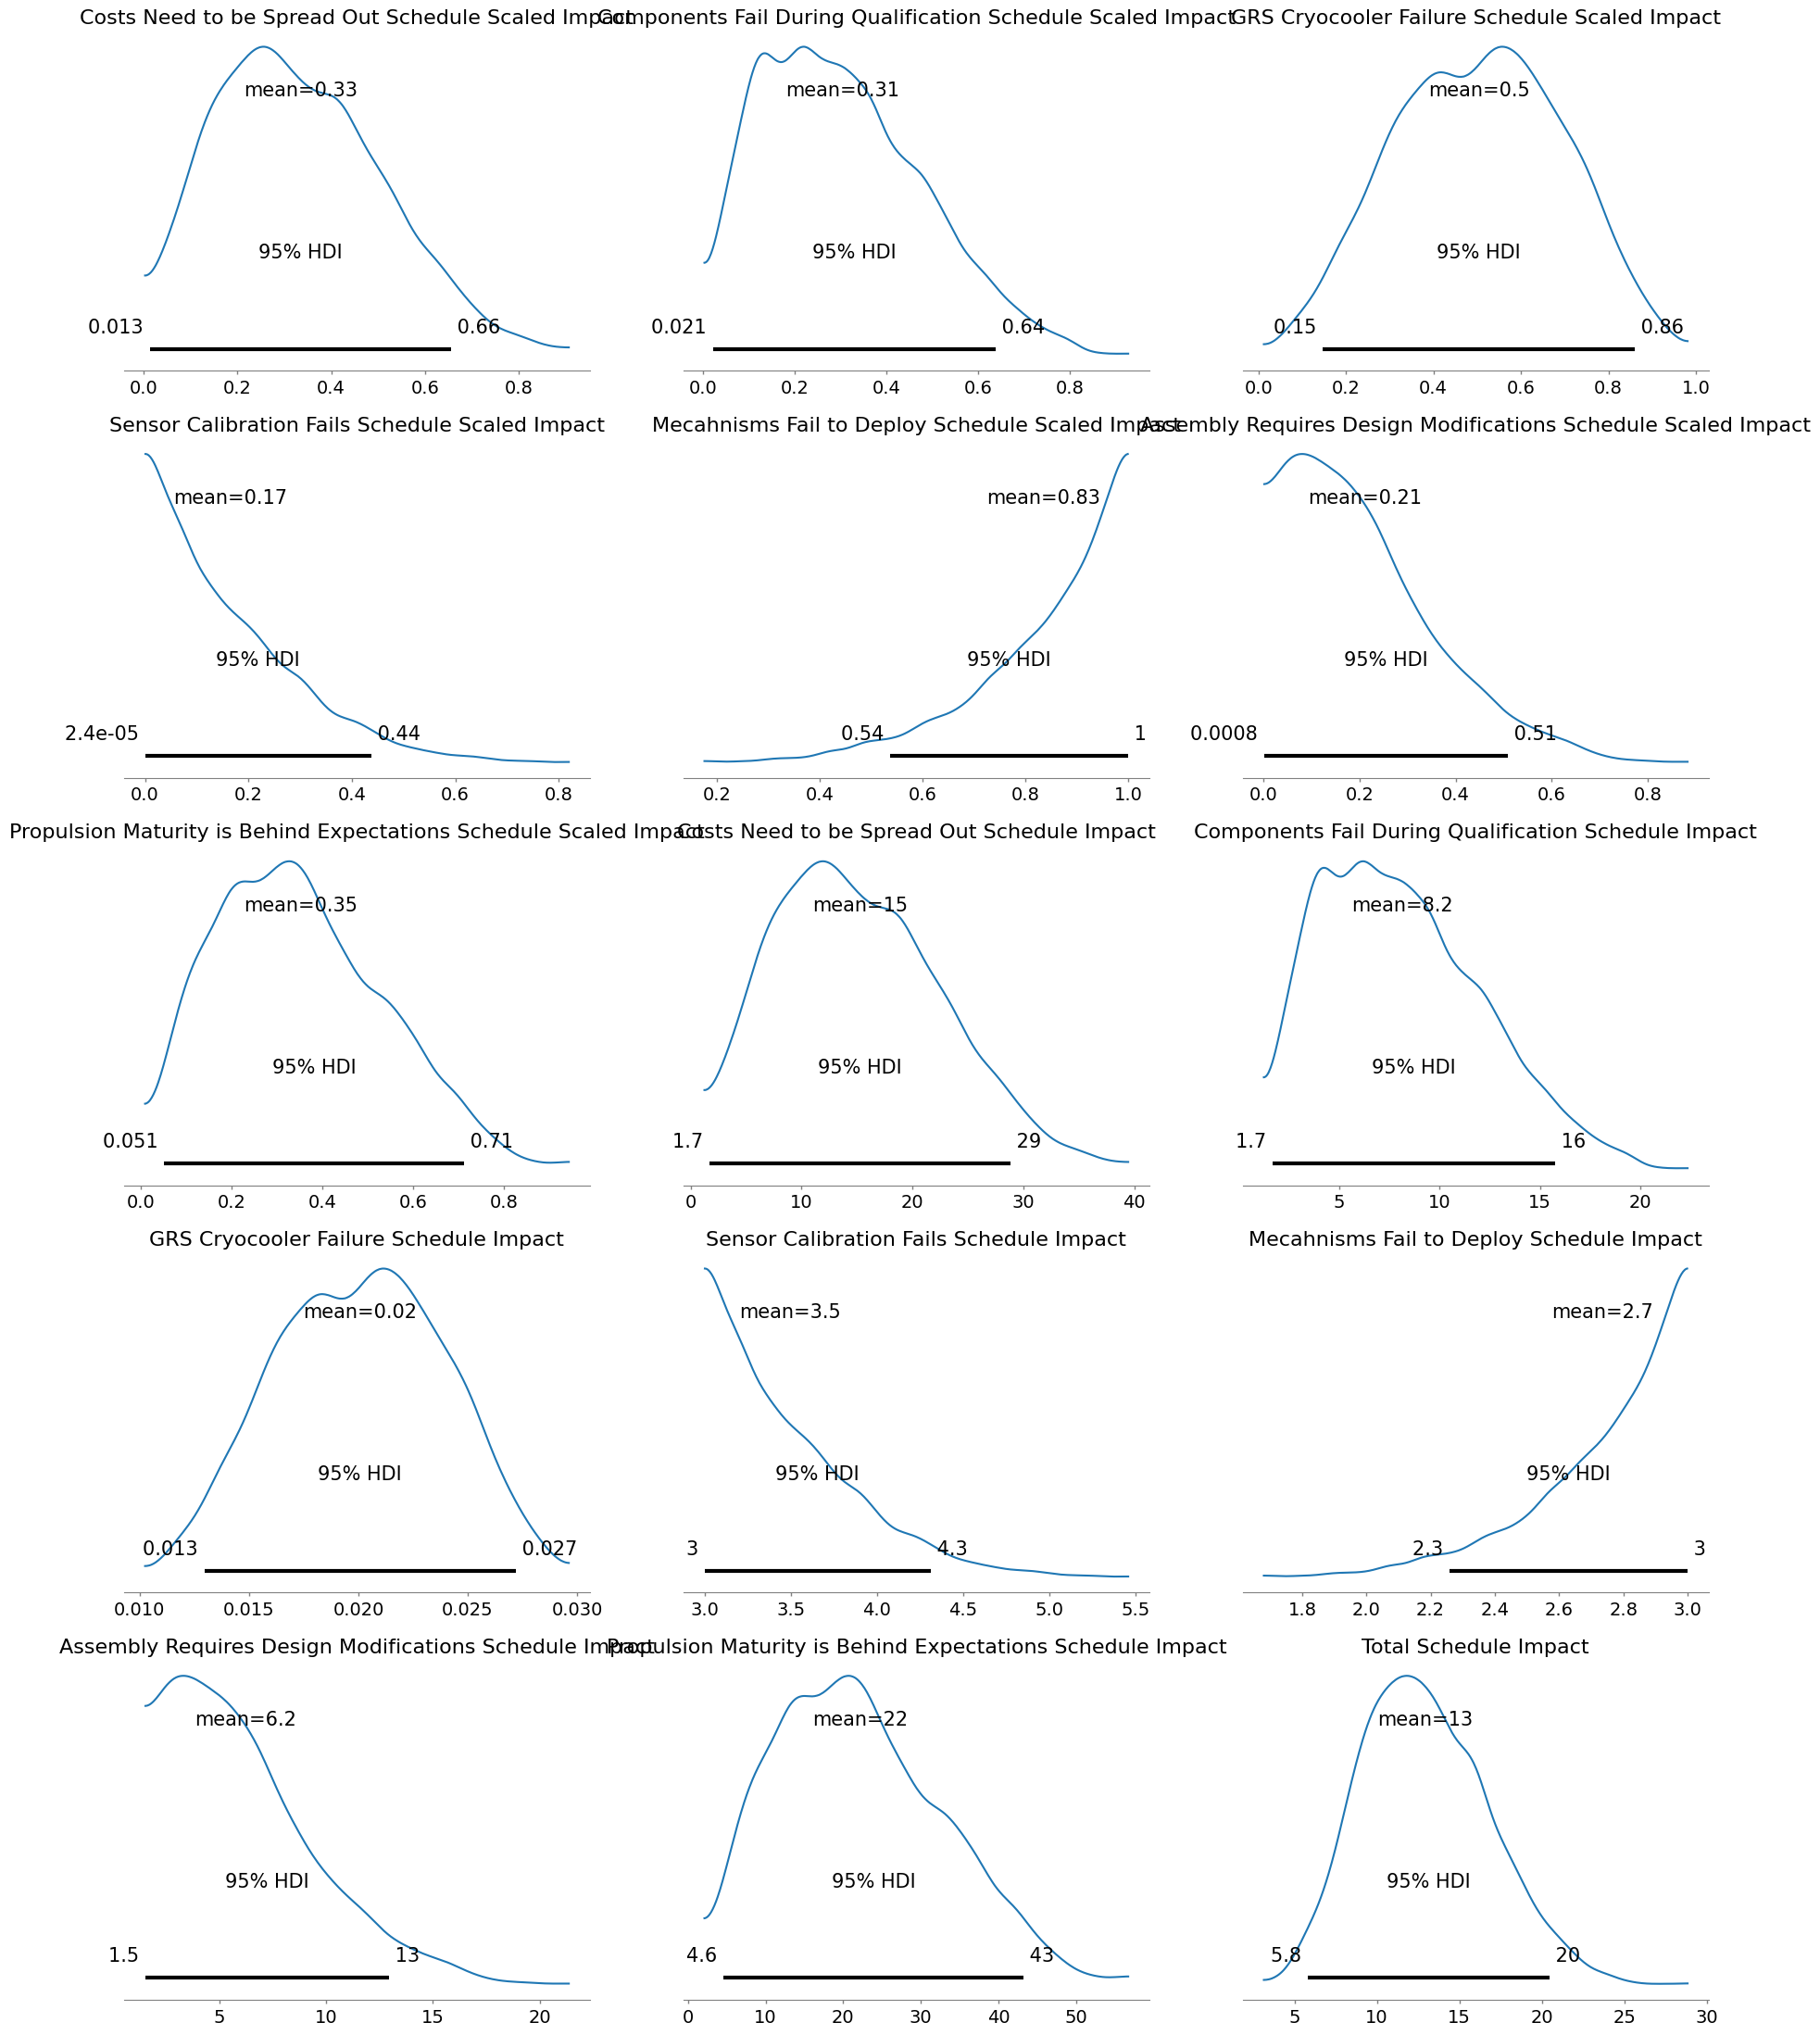

In [18]:
az.plot_posterior(results,
                  var_names=['Schedule'],
                  filter_vars='like',
                  hdi_prob=0.95)

In [19]:
az.summary(results,
           var_names=['Schedule Impact'],
           filter_vars="like",
           round_to=2,
           kind='stats')

,mean,sd,hdi_3%,hdi_97%
Costs Need to be Spread Out Schedule Impact,15.25,7.49,2.16,28.50
Components Fail During Qualification Schedule Impact,8.15,3.98,1.70,15.33
GRS Cryocooler Failure Schedule Impact,0.02,0.00,0.01,0.03
Sensor Calibration Fails Schedule Impact,3.50,0.41,3.00,4.26
Mecahnisms Fail to Deploy Schedule Impact,2.74,0.23,2.29,3.00
Assembly Requires Design Modifications Schedule Impact,6.24,3.41,1.52,12.50
Propulsion Maturity is Behind Expectations Schedule Impact,22.15,10.69,4.31,41.84
Total Schedule Impact,12.91,3.84,5.81,19.95


And finally, for your technical parameters:

In [20]:
#for idx, risk in Design_System.risks:
#    print(f'Technical Parameter {idx}: {risk.name}')

array([[<Axes: title={'center': 'Costs Need to be Spread Out Technical Parameter 0 Scaled Impact'}>,
        <Axes: title={'center': 'Costs Need to be Spread Out Technical Parameter 1 Scaled Impact'}>,
        <Axes: title={'center': 'Costs Need to be Spread Out Technical Parameter 2 Scaled Impact'}>,
        <Axes: title={'center': 'Costs Need to be Spread Out Technical Parameter 3 Scaled Impact'}>],
       [<Axes: title={'center': 'Components Fail During Qualification Technical Parameter 0 Scaled Impact'}>,
        <Axes: title={'center': 'Components Fail During Qualification Technical Parameter 1 Scaled Impact'}>,
        <Axes: title={'center': 'Components Fail During Qualification Technical Parameter 2 Scaled Impact'}>,
        <Axes: title={'center': 'Components Fail During Qualification Technical Parameter 3 Scaled Impact'}>],
       [<Axes: title={'center': 'GRS Cryocooler Failure Technical Parameter 0 Scaled Impact'}>,
        <Axes: title={'center': 'GRS Cryocooler Failure Te

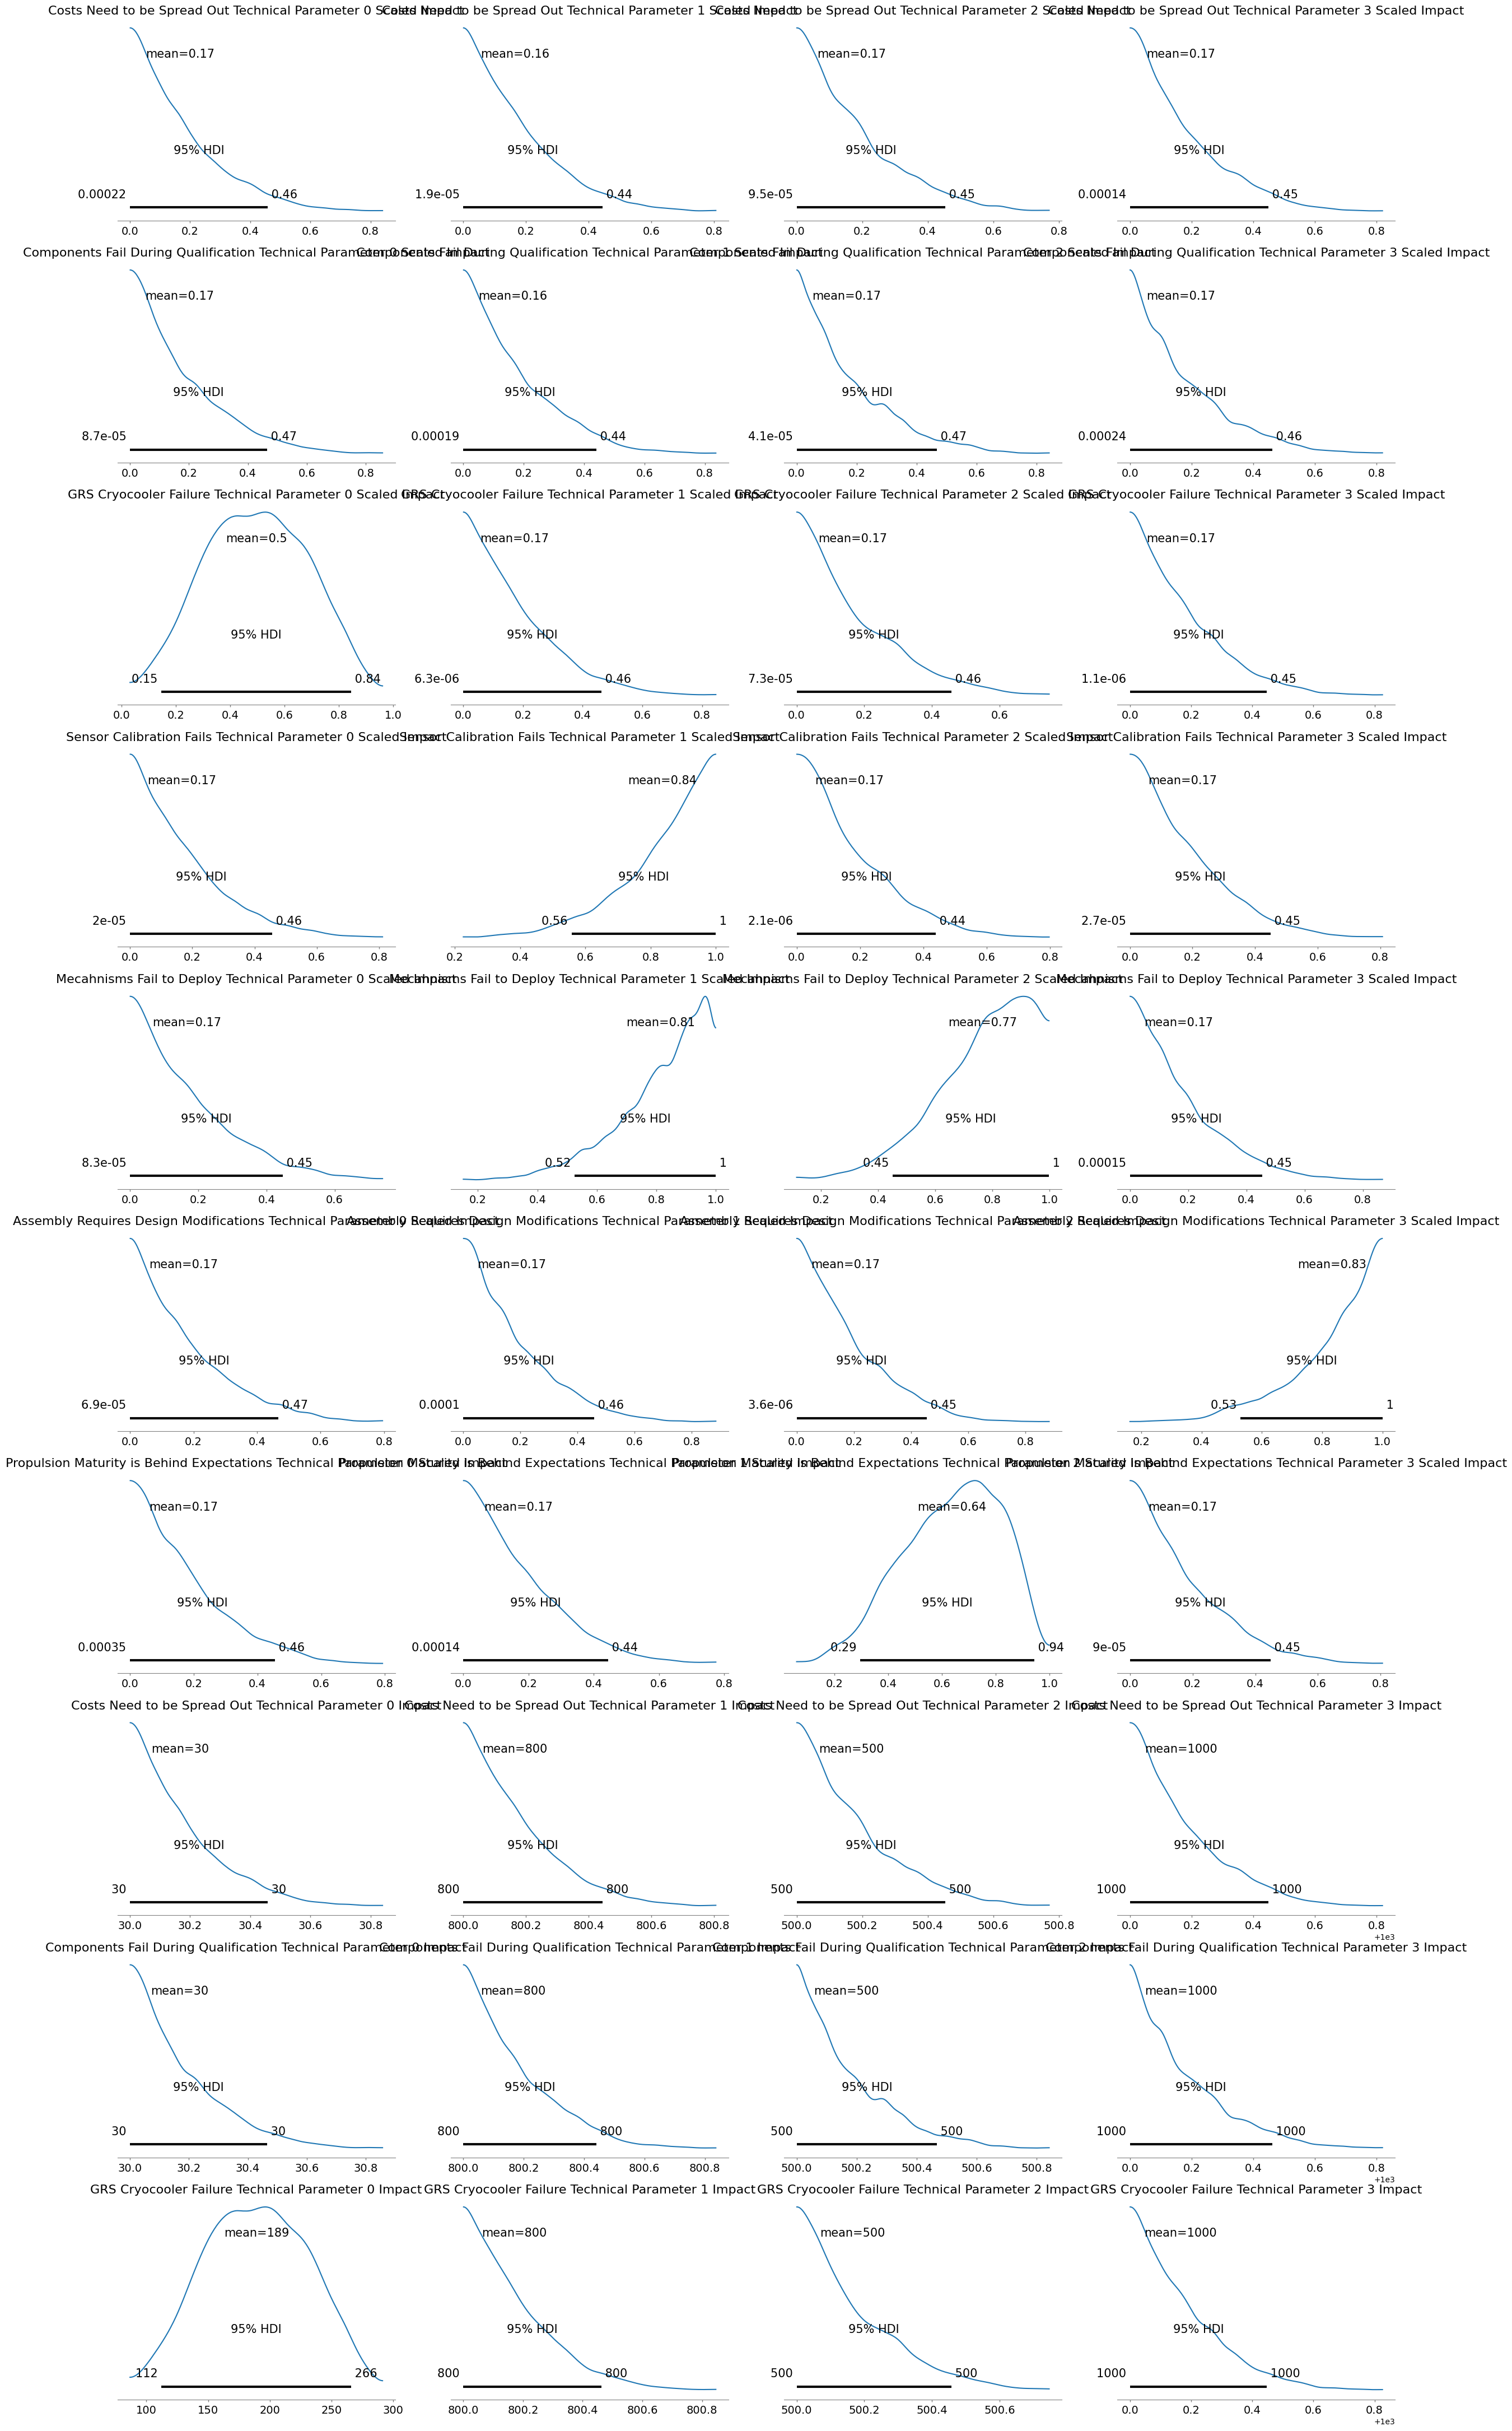

In [21]:
az.plot_posterior(results,
                  var_names=['Technical'],
                  filter_vars='like',
                  hdi_prob=0.95)

In [22]:
az.summary(results,
           var_names=['Schedule'],
           filter_vars="like",
           round_to=2,
           kind='stats')

,mean,sd,hdi_3%,hdi_97%
Costs Need to be Spread Out Schedule Scaled Impact,0.33,0.18,0.03,0.65
Components Fail During Qualification Schedule Scaled Impact,0.31,0.17,0.02,0.62
GRS Cryocooler Failure Schedule Scaled Impact,0.50,0.19,0.17,0.86
Sensor Calibration Fails Schedule Scaled Impact,0.17,0.14,0.00,0.42
Mecahnisms Fail to Deploy Schedule Scaled Impact,0.83,0.14,0.56,1.00
Assembly Requires Design Modifications Schedule Scaled Impact,0.21,0.15,0.00,0.49
Propulsion Maturity is Behind Expectations Schedule Scaled Impact,0.35,0.18,0.05,0.69
Costs Need to be Spread Out Schedule Impact,15.25,7.49,2.16,28.50
Components Fail During Qualification Schedule Impact,8.15,3.98,1.70,15.33
GRS Cryocooler Failure Schedule Impact,0.02,0.00,0.01,0.03


In [23]:
az.summary(results,
           var_names=['Technical Parameter 3 Impact', 'Mass Impact'],
           filter_vars="like",
           round_to=2,
           kind='stats')

,mean,sd,hdi_3%,hdi_97%
Costs Need to be Spread Out Technical Parameter 3 Impact,1000.17,0.14,1000.00,1000.43
Components Fail During Qualification Technical Parameter 3 Impact,1000.17,0.14,1000.00,1000.44
GRS Cryocooler Failure Technical Parameter 3 Impact,1000.17,0.14,1000.00,1000.43
Sensor Calibration Fails Technical Parameter 3 Impact,1000.17,0.14,1000.00,1000.43
Mecahnisms Fail to Deploy Technical Parameter 3 Impact,1000.17,0.14,1000.00,1000.43
Assembly Requires Design Modifications Technical Parameter 3 Impact,1799.59,173.62,1463.48,2000.00
Propulsion Maturity is Behind Expectations Technical Parameter 3 Impact,1000.17,0.14,1000.00,1000.43
Total Mass Impact,980.84,5.21,970.69,986.95


In [24]:
az.summary(results,
           var_names=['Total'],
           filter_vars="like",
           round_to=2,
           kind='stats')

,mean,sd,hdi_3%,hdi_97%
Total Cost Impact,39.25,9.77,21.47,56.95
Total Schedule Impact,12.91,3.84,5.81,19.95
Total GRS Temperature Impact,38.30,3.32,32.40,44.36
Total Power Impact,764.19,0.84,762.64,765.45
Total Delta V Impact,423.20,27.01,375.81,469.45
Total Mass Impact,980.84,5.21,970.69,986.95


# Assignment Submission

Once your results are in place for all of the above elements, print the notebook to PDF and submit it to the assignment.

In [43]:
full_impact_list = [Cost_Risk_Table, Schedule_Risk_Table, GRS_Temp, Payload_Power, Payload_Delta_v, Payload_Mass]
impact_names_list = ['Total Cost Impact', 'Total Schedule Impact', 'Total GRS Temperature Impact', 'Total Power Impact', 'Total Delta V Impact', 'Total Mass Impact']

total_impact = 0
for i in range(len(full_impact_list)):
    mean_impact = full_impact_list[i].logistic_utility(az.summary(results, var_names=[impact_names_list[i]], filter_vars="like", round_to=2, kind='stats')['mean'][0])
    print(mean_impact)
    total_impact += mean_impact
print('--------')
print(total_impact)

-2.9455387517723484
-8.731760751897058
-0.9363066469546972
1.6747781809176682e-07
6.179012676137438
8.146102229522072
--------
1.7115089225132234
